In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
import plotly.express as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.manifold import TSNE 
from sklearn.cluster import AgglomerativeClustering 

In [2]:
mush_data_raw = pd.read_csv('/Users/robertmoss/Desktop/Mushroom/agaricus-lepiota_data.csv', header = None)

In [3]:
mush_data_raw.head()

0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]

In [4]:
column_names = ['Edible', 'Cap_Shape', 'Cap_Surface', 'Cap-Color','Bruises', 'Odor', 'Gill_Attachment', 'Gill_Spacing','Gill_Size', 'Gill_Color', 'Stalk_Shape', 'Stalk_Root', 'Stalk_Surface_Above_Ring', 'Stalk_Surface_Below_Ring', 'Stalk_Color_Above_Ring', 'Stock_Color_Below_Ring', 'Veil_Type', 'Veil_Color', 'Ring_Number', 'Ring_Type', 'Spor_Print_Color', 'Population', 'Habitat']
mush_data_raw.columns = column_names

In [5]:
mush_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
Edible                      8124 non-null object
Cap_Shape                   8124 non-null object
Cap_Surface                 8124 non-null object
Cap-Color                   8124 non-null object
Bruises                     8124 non-null object
Odor                        8124 non-null object
Gill_Attachment             8124 non-null object
Gill_Spacing                8124 non-null object
Gill_Size                   8124 non-null object
Gill_Color                  8124 non-null object
Stalk_Shape                 8124 non-null object
Stalk_Root                  8124 non-null object
Stalk_Surface_Above_Ring    8124 non-null object
Stalk_Surface_Below_Ring    8124 non-null object
Stalk_Color_Above_Ring      8124 non-null object
Stock_Color_Below_Ring      8124 non-null object
Veil_Type                   8124 non-null object
Veil_Color                  8124 non-null object
Ring_Number

In [6]:
mush_data_raw.to_csv(r'/Users/robertmoss/Desktop/export_dataframe.csv', index=False, header=True)

In [7]:
mush_data_raw.isnull().sum()

Edible                      0
Cap_Shape                   0
Cap_Surface                 0
Cap-Color                   0
Bruises                     0
Odor                        0
Gill_Attachment             0
Gill_Spacing                0
Gill_Size                   0
Gill_Color                  0
Stalk_Shape                 0
Stalk_Root                  0
Stalk_Surface_Above_Ring    0
Stalk_Surface_Below_Ring    0
Stalk_Color_Above_Ring      0
Stock_Color_Below_Ring      0
Veil_Type                   0
Veil_Color                  0
Ring_Number                 0
Ring_Type                   0
Spor_Print_Color            0
Population                  0
Habitat                     0
dtype: int64

In [8]:
(mush_data_raw =='?').sum()

Edible                         0
Cap_Shape                      0
Cap_Surface                    0
Cap-Color                      0
Bruises                        0
Odor                           0
Gill_Attachment                0
Gill_Spacing                   0
Gill_Size                      0
Gill_Color                     0
Stalk_Shape                    0
Stalk_Root                  2480
Stalk_Surface_Above_Ring       0
Stalk_Surface_Below_Ring       0
Stalk_Color_Above_Ring         0
Stock_Color_Below_Ring         0
Veil_Type                      0
Veil_Color                     0
Ring_Number                    0
Ring_Type                      0
Spor_Print_Color               0
Population                     0
Habitat                        0
dtype: int64

/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


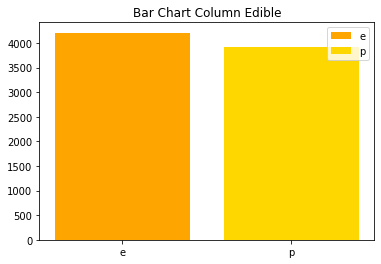

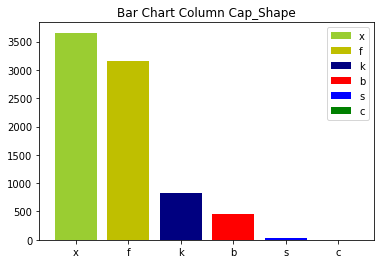

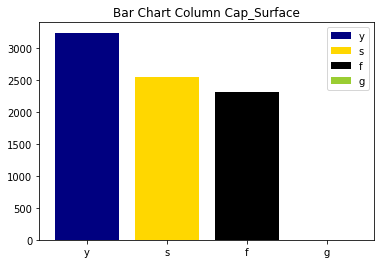

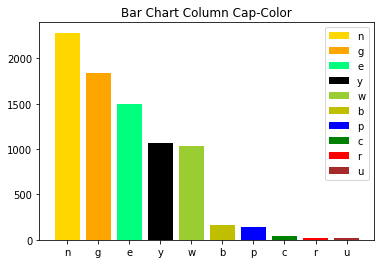

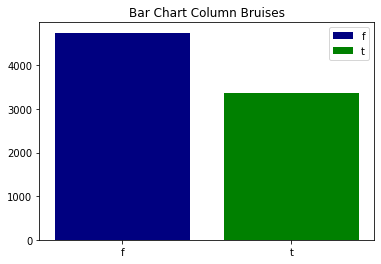

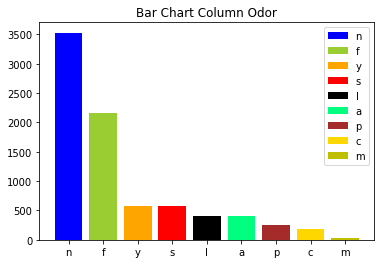

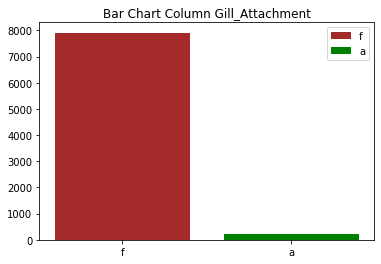

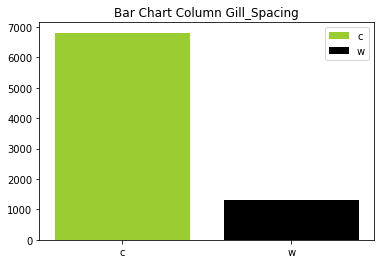

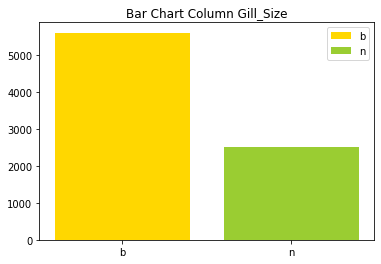

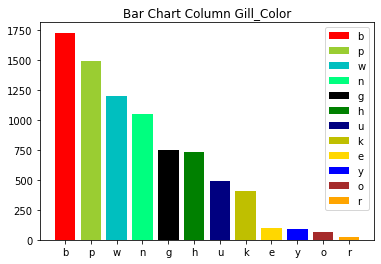

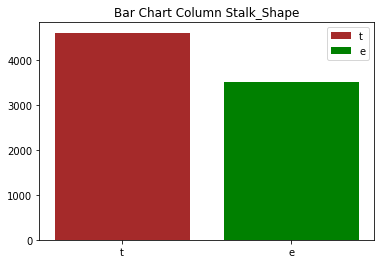

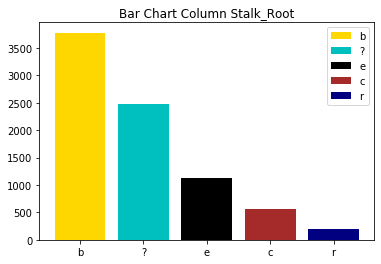

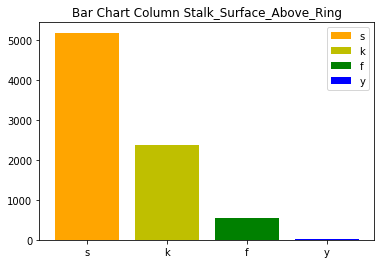

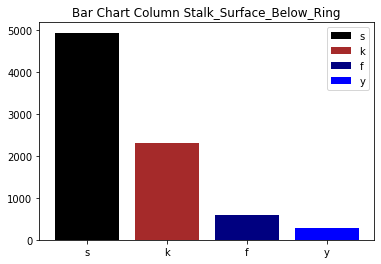

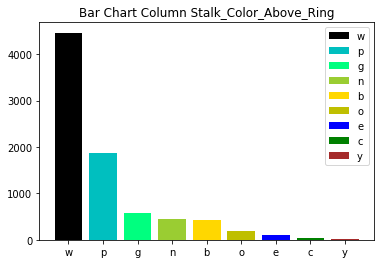

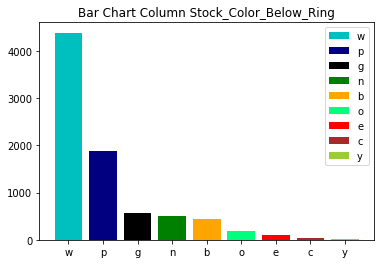

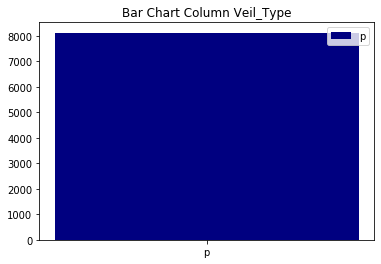

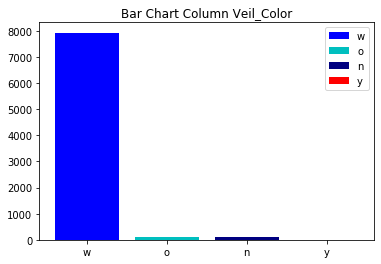

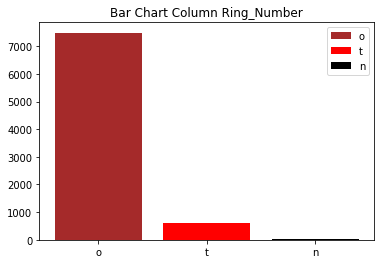

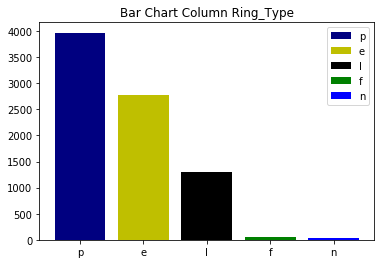

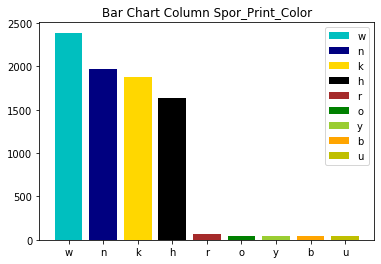

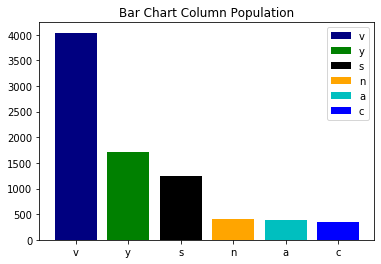

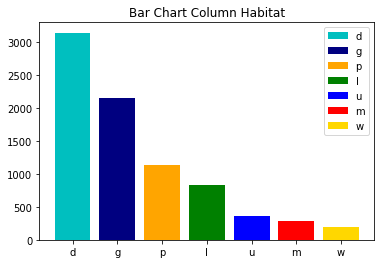

In [9]:
color_array = [ 'r', 'b', 'k', 'g', 'orange', 'c', 'y', 'navy', 'springgreen', 'gold', 'brown', 'yellowgreen']
for column in column_names:
    frequencies =  mush_data_raw[column].value_counts()
    seleceted_colors = np.random.choice(color_array, size = len(frequencies), replace=False)
    plt.figure()
    handles = plt.bar(x=frequencies.index, height=frequencies.values, color=seleceted_colors)
    plt.title(f"Bar Chart Column {column}")
    plt.legend(handles, frequencies.index)

/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

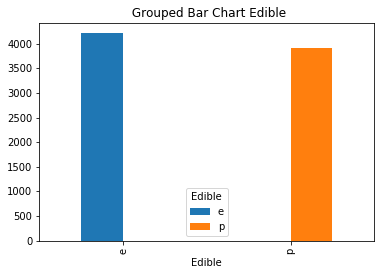

<Figure size 432x288 with 0 Axes>

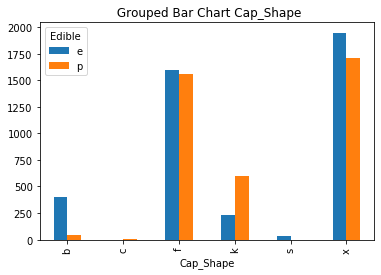

<Figure size 432x288 with 0 Axes>

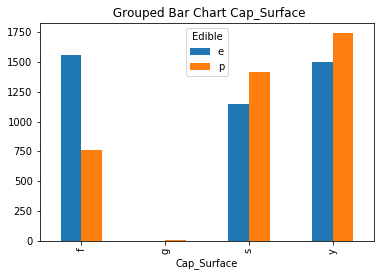

<Figure size 432x288 with 0 Axes>

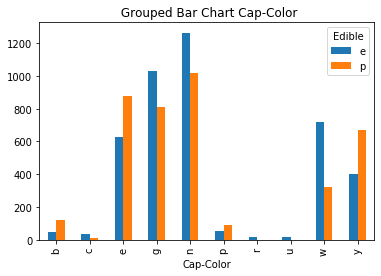

<Figure size 432x288 with 0 Axes>

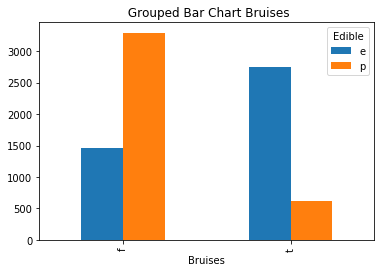

<Figure size 432x288 with 0 Axes>

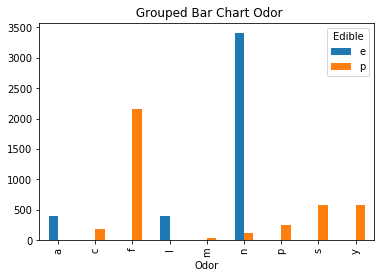

<Figure size 432x288 with 0 Axes>

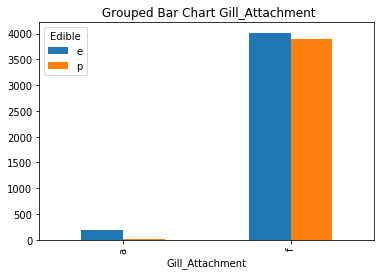

<Figure size 432x288 with 0 Axes>

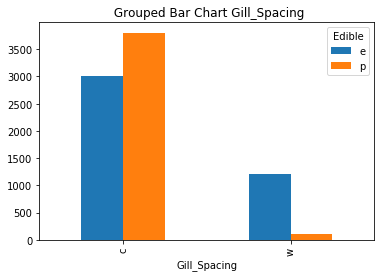

<Figure size 432x288 with 0 Axes>

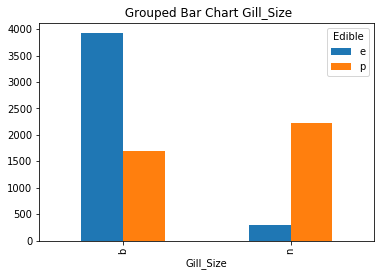

<Figure size 432x288 with 0 Axes>

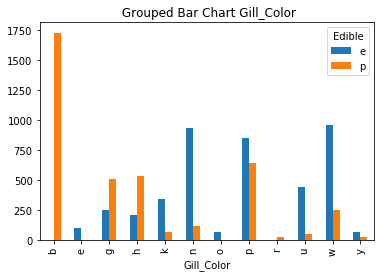

<Figure size 432x288 with 0 Axes>

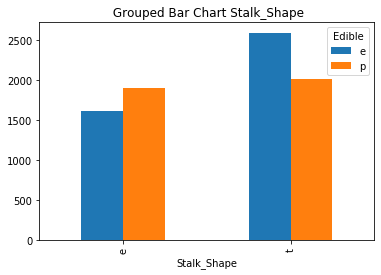

<Figure size 432x288 with 0 Axes>

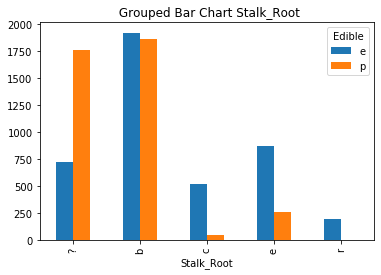

<Figure size 432x288 with 0 Axes>

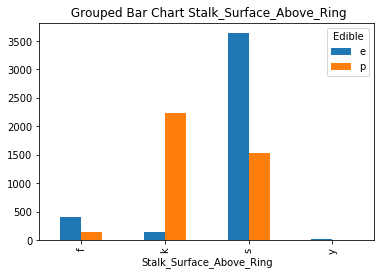

<Figure size 432x288 with 0 Axes>

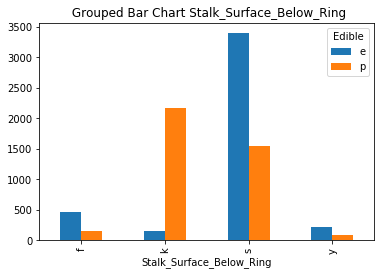

<Figure size 432x288 with 0 Axes>

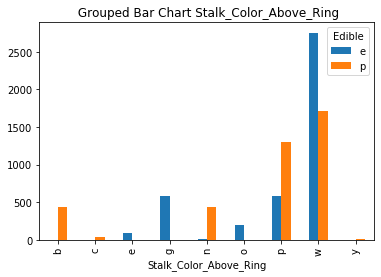

<Figure size 432x288 with 0 Axes>

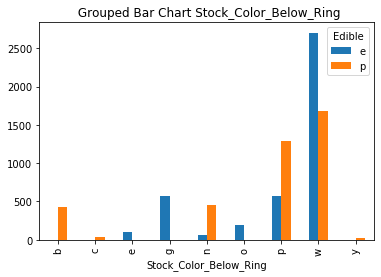

<Figure size 432x288 with 0 Axes>

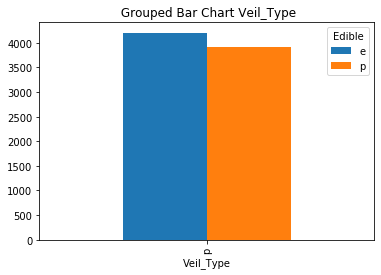

<Figure size 432x288 with 0 Axes>

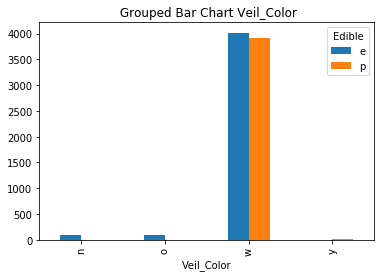

<Figure size 432x288 with 0 Axes>

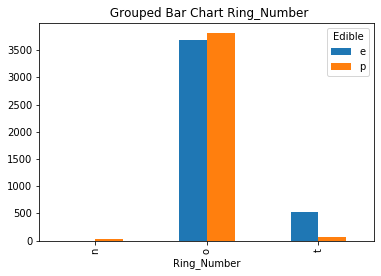

<Figure size 432x288 with 0 Axes>

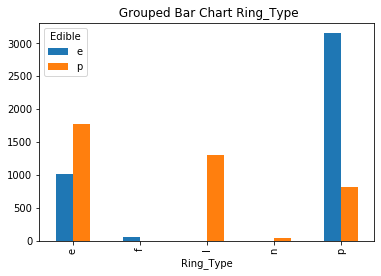

<Figure size 432x288 with 0 Axes>

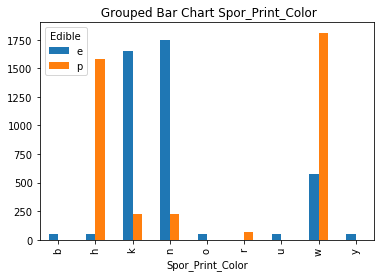

<Figure size 432x288 with 0 Axes>

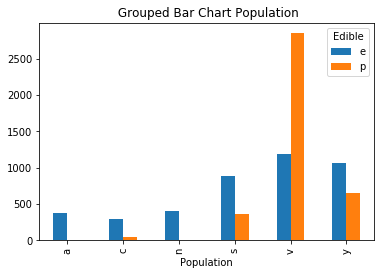

<Figure size 432x288 with 0 Axes>

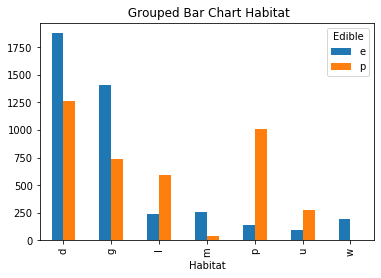

In [10]:
for column in column_names:
    
    tabbed_data = pd.crosstab(columns=mush_data_raw[column],index=mush_data_raw['Edible'])
    tabbed_data = tabbed_data.T
    plt.figure()
    tabbed_data.plot(kind='bar')
    plt.title(f" Grouped Bar Chart {column}")

In [11]:
mush_data_raw = mush_data_raw.drop('Stalk_Root', axis=1)

In [12]:
mush_data_raw = mush_data_raw.drop('Veil_Type', axis=1)

In [13]:
mush_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
Edible                      8124 non-null object
Cap_Shape                   8124 non-null object
Cap_Surface                 8124 non-null object
Cap-Color                   8124 non-null object
Bruises                     8124 non-null object
Odor                        8124 non-null object
Gill_Attachment             8124 non-null object
Gill_Spacing                8124 non-null object
Gill_Size                   8124 non-null object
Gill_Color                  8124 non-null object
Stalk_Shape                 8124 non-null object
Stalk_Surface_Above_Ring    8124 non-null object
Stalk_Surface_Below_Ring    8124 non-null object
Stalk_Color_Above_Ring      8124 non-null object
Stock_Color_Below_Ring      8124 non-null object
Veil_Color                  8124 non-null object
Ring_Number                 8124 non-null object
Ring_Type                   8124 non-null object
Spor_Print_

In [14]:
duplicate = mush_data_raw[mush_data_raw.duplicated()]
duplicate

Empty DataFrame
Columns: [Edible, Cap_Shape, Cap_Surface, Cap-Color, Bruises, Odor, Gill_Attachment, Gill_Spacing, Gill_Size, Gill_Color, Stalk_Shape, Stalk_Surface_Above_Ring, Stalk_Surface_Below_Ring, Stalk_Color_Above_Ring, Stock_Color_Below_Ring, Veil_Color, Ring_Number, Ring_Type, Spor_Print_Color, Population, Habitat]
Index: []

[0 rows x 21 columns]

In [15]:
y = mush_data_raw['Edible']
y.shape

(8124,)

In [16]:
X = mush_data_raw.drop(['Edible'], axis =1)
X.head()

Cap_Shape Cap_Surface Cap-Color Bruises Odor Gill_Attachment Gill_Spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  Gill_Size Gill_Color Stalk_Shape Stalk_Surface_Above_Ring  \
0         n          k           e                        s   
1         b          k           e                        s   
2         b          n           e                        s   
3         n          n           e                        s   
4         b          k           t                        s   

  Stalk_Surface_Below_Ring Stalk_Color_Above_Ring Stock_Color_Below_Ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2                        s                      w                      w   
3                        s                      w                      w   
4                        s                      w                      w   

  Veil_Color Ring_Number Ring_Type Spor_Print_Color Population Habitat  
0          w           o         p                k          s       u  
1          w           o         p                n          n       g  
2          w           o         p                n          n       m  
3          w           o         p                k          s       u  
4          w           o         e                n          a       g

In [17]:
#ordinal encoder

In [18]:
X_with_dummies = pd.get_dummies(X)
X_with_dummies.head()

Cap_Shape_b  Cap_Shape_c  Cap_Shape_f  Cap_Shape_k  Cap_Shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Cap_Shape_x  Cap_Surface_f  Cap_Surface_g  Cap_Surface_s  Cap_Surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  Population_s  Population_v  Population_y  Habitat_d  Habitat_g  \
0  ...             1             0             0          0          0   
1  ...             0             0             0          0          1   
2  ...             0             0             0          0          0   
3  ...             1             0             0          0          0   
4  ...             0             0             0          0          1   

   Habitat_l  Habitat_m  Habitat_p  Habitat_u  Habitat_w  
0          0          0          0          1          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          0          1          0  
4          0          0          0          0          0  

[5 rows x 111 columns]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_with_dummies, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

(6499, 111)
(6499,)


In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_val)

In [21]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       673
           p       1.00      1.00      1.00       627

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [22]:
y_final_test = knn.predict(X_test)
print(classification_report(y_test, y_final_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



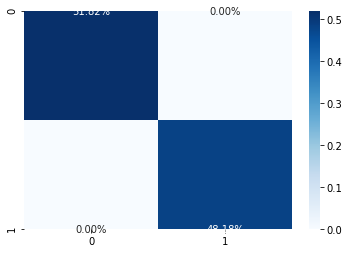

In [23]:
cf_matrix = confusion_matrix(y_test, y_final_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [24]:
pca_2 = PCA(n_components=2)
pca_2_df = pd.DataFrame(pca_2.fit_transform(X_train))
pca_2_df.head()

0         1
0  1.907755 -1.616533
1 -1.663772  0.144582
2  2.090446 -1.429117
3 -1.694230  0.047499
4  1.731980  1.944075

In [25]:
explained_variance_2 = pca_2.explained_variance_ratio_
explained_variance_2

array([0.1696017 , 0.13115519])

In [26]:
explained_variance_2 = np.insert(explained_variance_2,0,0)
explained_variance_2

array([0.        , 0.1696017 , 0.13115519])

In [27]:
cumulative_variance_2 = np.cumsum(np.round(explained_variance_2, decimals=3))

In [28]:
pca_2_df_variance = pd.DataFrame(['', 'PCA1', 'PCA2'], columns =['PC'])
explained_variance_df_2 = pd.DataFrame(explained_variance_2, columns=['Explained Variance'])
cumulative_variance_df_2 = pd.DataFrame(cumulative_variance_2, columns=['Cumulative Variance'])

In [29]:
df_pca_2_explained_variance = pd.concat([pca_2_df_variance, explained_variance_df_2, cumulative_variance_df_2], axis=1)
df_pca_2_explained_variance

PC  Explained Variance  Cumulative Variance
0                  0.000000                0.000
1  PCA1            0.169602                0.170
2  PCA2            0.131155                0.301

In [30]:
fig = py.bar(df_pca_2_explained_variance, x = 'PC', y ='Explained Variance', 
            width = 800)
#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_pca_2_explained_variance['PC'], 
    y = df_pca_2_explained_variance['Cumulative Variance'],
    marker = dict(size=15, color="LightSeaGreen")))

fig.add_trace(
    go.Bar(
        x = df_pca_2_explained_variance['PC'],
        y = df_pca_2_explained_variance['Explained Variance'], 
        marker = dict(color="RoyalBlue")))

In [32]:
kmeans_2 = KMeans(n_clusters =23)
kmeans_2.fit(pca_2_df)
kmeans_2.labels_

array([ 2,  9, 10, ..., 13, 13,  4], dtype=int32)

In [33]:
y_knn_2 = kmeans_2.fit_predict(pca_2_df)

In [34]:
pca_2_cluster_labels = np.unique(kmeans_2.labels_)
n_clusters = pca_2_cluster_labels.shape[0]
silhouette_pca_2_vals = silhouette_samples(pca_2_df,y_knn_2)


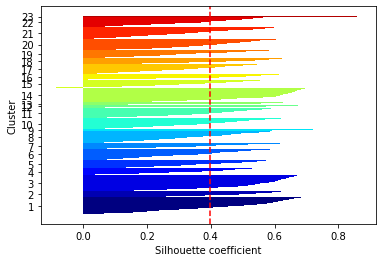

In [35]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(pca_2_cluster_labels):

    c_silhouette_vals = silhouette_pca_2_vals[y_knn_2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_pca_2_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, pca_2_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

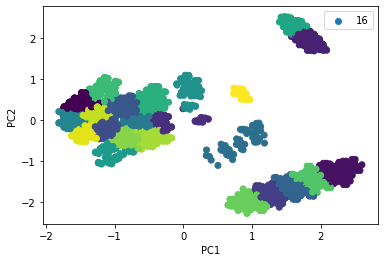

In [36]:
plt.scatter(pca_2_df[0], pca_2_df[1], c=kmeans_2.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(kmeans_2.labels_)

In [37]:
pca_3 = PCA(n_components=3)
pca_3_df = pd.DataFrame(pca_3.fit_transform(X_train), columns=['PCA1', 'PCA2', 'PCA3'])
pca_3_df.head()

PCA1      PCA2      PCA3
0  1.907755 -1.616533 -0.681092
1 -1.663772  0.144584 -0.959631
2  2.090446 -1.429117  0.124273
3 -1.694230  0.047501 -1.035684
4  1.731980  1.944077 -0.586049

In [38]:
explained_variance = pca_3.explained_variance_ratio_
explained_variance

array([0.1696017 , 0.13115519, 0.09432052])

In [39]:
explained_variance = np.insert(explained_variance, 0,0)

In [40]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [41]:
pca_3_df_variance = pd.DataFrame(['', 'PCA1', 'PCA2', 'PCA3'], columns =['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [42]:
df_pca_3_explained_variance = pd.concat([pca_3_df_variance, explained_variance_df, cumulative_variance_df], axis=1)
df_pca_3_explained_variance

PC  Explained Variance  Cumulative Variance
0                  0.000000                0.000
1  PCA1            0.169602                0.170
2  PCA2            0.131155                0.301
3  PCA3            0.094321                0.395

In [43]:
fig = py.bar(df_pca_3_explained_variance, x = 'PC', y ='Explained Variance', 
            width = 800)
#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_pca_3_explained_variance['PC'], 
    y = df_pca_3_explained_variance['Cumulative Variance'],
    marker = dict(size=15, color="LightSeaGreen")))

fig.add_trace(
    go.Bar(
        x = df_pca_3_explained_variance['PC'],
        y = df_pca_3_explained_variance['Explained Variance'], 
        marker = dict(color="RoyalBlue")))

In [45]:
kmeans_3 = KMeans(n_clusters =23)
kmeans_3.fit(pca_3_df)
kmeans_3.labels_

array([ 6, 14,  0, ...,  4,  4,  1], dtype=int32)

In [46]:
y_knn_3 = kmeans_3.fit_predict(pca_3_df)

In [47]:
pca_3_cluster_labels = np.unique(kmeans_3.labels_)
n_clusters = pca_3_cluster_labels.shape[0]
silhouette_pca_3_vals = silhouette_samples(pca_3_df,y_knn_3)

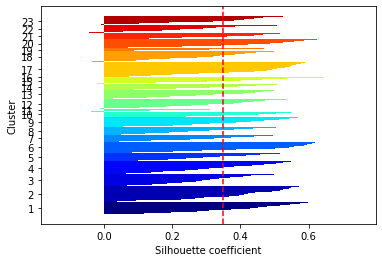

In [48]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(pca_3_cluster_labels):

    c_silhouette_vals = silhouette_pca_3_vals[y_knn_3 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_pca_3_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, pca_3_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [49]:
fig = py.scatter_3d(pca_3_df, x='PCA1', y='PCA2', z='PCA3',
              color=kmeans_3.labels_)

fig.show()

In [50]:
pca_full = PCA() 
pca_df = pd.DataFrame(pca_full.fit_transform(X_train))
pca_df.head()

0         1         2         3         4         5         6    \
0  1.907755 -1.616533 -0.681092 -0.213338  0.240641  0.226295  0.632136   
1 -1.663772  0.144582 -0.959648  0.725139 -0.640250  0.340207 -0.087756   
2  2.090446 -1.429118  0.124262 -0.133529 -0.756197 -0.035384 -0.005245   
3 -1.694230  0.047499 -1.035705  0.703291 -0.633045  0.460940 -0.018989   
4  1.731980  1.944076 -0.586049  0.335135  0.360633 -0.150109 -0.818545   

        7         8         9    ...           101           102  \
0 -0.223244 -0.587332  0.046741  ...  9.130530e-17 -1.532547e-16   
1 -0.115416 -0.314014  0.839899  ...  2.495104e-16 -1.278399e-15   
2 -0.308212  0.639578  0.016269  ... -1.961443e-16  4.338527e-16   
3 -0.071344 -0.338520  0.829635  ... -3.598587e-16 -4.520925e-17   
4  0.659921  0.063301  0.065767  ... -1.815849e-16  4.381024e-16   

            103           104           105           106           107  \
0 -2.058588e-17  4.668692e-18 -6.669586e-17  1.061050e-16  8.591967e-18   
1 -3.186216e-16 -4.523058e-16 -1.371998e-16  2.539582e-16 -7.179789e-16   
2  5.665696e-16 -9.191994e-16 -1.002040e-15 -6.653691e-16  4.734711e-16   
3 -9.133043e-17  2.769516e-16  4.182820e-16  6.530840e-17 -2.361843e-16   
4 -8.856608e-17  1.635916e-16  3.699227e-17  1.113327e-16 -6.788467e-16   

            108           109           110  
0  2.299978e-16  2.981912e-16 -1.837203e-16  
1 -6.324980e-16  9.927254e-16 -3.504476e-16  
2 -7.241605e-18 -9.053822e-16  2.962647e-16  
3 -3.460175e-16 -1.134615e-16  1.201162e-16  
4  1.081688e-16  1.873851e-16  1.242086e-16  

[5 rows x 111 columns]

In [51]:
explained_variance = pca_full.explained_variance_ratio_
explained_variance

array([1.69601700e-01, 1.31155195e-01, 9.43205185e-02, 6.27872237e-02,
       3.99705952e-02, 3.82559324e-02, 3.21985770e-02, 2.81400002e-02,
       2.70879570e-02, 2.21859556e-02, 2.09482109e-02, 1.96161230e-02,
       1.87444509e-02, 1.75808475e-02, 1.59476051e-02, 1.54339773e-02,
       1.52538017e-02, 1.46099491e-02, 1.34126341e-02, 1.21171012e-02,
       1.10920812e-02, 1.05976714e-02, 1.04521505e-02, 9.76823880e-03,
       9.04661271e-03, 8.40595832e-03, 8.30757981e-03, 7.73011938e-03,
       7.58027940e-03, 7.09232743e-03, 6.67587443e-03, 6.47033879e-03,
       5.84896823e-03, 5.49717174e-03, 5.40146933e-03, 5.00287453e-03,
       4.83437339e-03, 4.66136456e-03, 4.46877741e-03, 4.27601700e-03,
       4.16129172e-03, 3.79418410e-03, 3.62476933e-03, 3.35504978e-03,
       3.16999021e-03, 2.88166902e-03, 2.40083660e-03, 2.26208251e-03,
       2.13910144e-03, 2.06664972e-03, 1.89160734e-03, 1.60794976e-03,
       1.38049782e-03, 1.27170995e-03, 1.12561777e-03, 1.11212115e-03,
      

In [52]:
explained_variance = np.insert(explained_variance, 0,0)

In [53]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [54]:
pca_full_df_variance = pd.DataFrame()
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [55]:
df_pca_full_explained_variance = pd.concat([pca_full_df_variance, explained_variance_df, cumulative_variance_df], axis=1)
df_pca_full_explained_variance

Explained Variance  Cumulative Variance
0          0.000000e+00                0.000
1          1.696017e-01                0.170
2          1.311552e-01                0.301
3          9.432052e-02                0.395
4          6.278722e-02                0.458
..                  ...                  ...
107        7.456060e-34                0.996
108        2.803867e-34                0.996
109        2.749292e-34                0.996
110        2.171251e-34                0.996
111        1.139227e-34                0.996

[112 rows x 2 columns]

In [56]:
fig = py.bar(df_pca_full_explained_variance, x = df_pca_full_explained_variance.index , y ='Explained Variance', 
            width = 800)
#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [57]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_pca_full_explained_variance.index, 
    y = df_pca_full_explained_variance['Cumulative Variance'],
    marker = dict(size=15, color="LightSeaGreen")))

fig.add_trace(
    go.Bar(
        x = df_pca_full_explained_variance.index,
        y = df_pca_full_explained_variance['Explained Variance'], 
        marker = dict(color="RoyalBlue")))

In [58]:
loadings = pca_full.components_.T
df_loadings = pd.DataFrame(loadings, columns=[f"PC{i+1}" for i in range(pca_df.shape[1])], index=X_train.columns)
df_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Cap_Shape_b -0.030496  0.015523  0.044880 -0.080312  0.051678  0.046195   
Cap_Shape_c  0.000080 -0.000144  0.000499 -0.000402  0.000741  0.001444   
Cap_Shape_f  0.008849  0.022541 -0.071333  0.151495  0.568984 -0.295973   
Cap_Shape_k  0.060758 -0.083697  0.018005 -0.037679  0.055150  0.111574   
Cap_Shape_s -0.001211 -0.000319  0.001447 -0.002192 -0.000809  0.004387   
...               ...       ...       ...       ...       ...       ...   
Habitat_l    0.060030 -0.086498  0.003802 -0.042426  0.067687  0.157081   
Habitat_m   -0.027932  0.010599  0.016122 -0.078265 -0.002058 -0.018390   
Habitat_p    0.110145  0.000984 -0.021668 -0.057302  0.017375 -0.045698   
Habitat_u   -0.019960 -0.000981  0.014679 -0.052392 -0.006409 -0.062010   
Habitat_w   -0.007887 -0.003101  0.007238 -0.023262  0.054777  0.065957   

                  PC7       PC8       PC9      PC10  ...         PC102  \
Cap_Shape_b  0.004349 -0.000011  0.037998 -0.002580  ...  0.000000e+00   
Cap_Shape_c  0.001389  0.000949 -0.000662 -0.000058  ... -3.225882e-16   
Cap_Shape_f -0.139391  0.170651 -0.064893 -0.003577  ... -2.272429e-17   
Cap_Shape_k  0.043828  0.011726  0.082566 -0.004971  ... -9.513009e-17   
Cap_Shape_s -0.006370  0.015237 -0.008943  0.004229  ...  3.667715e-16   
...               ...       ...       ...       ...  ...           ...   
Habitat_l   -0.074578 -0.100463 -0.099495 -0.011843  ...  2.787951e-02   
Habitat_m    0.003088 -0.020453  0.019355 -0.005038  ...  2.787951e-02   
Habitat_p    0.049389 -0.052586 -0.013942 -0.003964  ...  2.787951e-02   
Habitat_u   -0.100882  0.019636 -0.012653  0.013936  ...  2.787951e-02   
Habitat_w    0.068267 -0.027678  0.082976 -0.008086  ...  2.787951e-02   

                    PC103         PC104         PC105         PC106  \
Cap_Shape_b  0.000000e+00 -0.000000e+00 -0.000000e+00  0.000000e+00   
Cap_Shape_c  1.425322e-15 -3.324806e-15 -1.807647e-15 -4.758556e-16   
Cap_Shape_f -1.575991e-16  2.119561e-16  9.856341e-17  1.733000e-17   
Cap_Shape_k -1.291897e-16  1.496251e-16  7.946202e-17 -2.205422e-18   
Cap_Shape_s  7.587249e-16  1.520466e-15  5.260113e-16  8.207731e-17   
...                   ...           ...           ...           ...   
Habitat_l    2.461802e-02  1.566394e-03  9.363622e-05 -4.004605e-04   
Habitat_m    2.461802e-02  1.566394e-03  9.363622e-05 -4.004605e-04   
Habitat_p    2.461802e-02  1.566394e-03  9.363622e-05 -4.004605e-04   
Habitat_u    2.461802e-02  1.566394e-03  9.363622e-05 -4.004605e-04   
Habitat_w    2.461802e-02  1.566394e-03  9.363622e-05 -4.004605e-04   

                    PC107         PC108         PC109         PC110  \
Cap_Shape_b  0.000000e+00  0.000000e+00 -0.000000e+00 -0.000000e+00   
Cap_Shape_c  4.939348e-16 -4.849486e-16 -4.549151e-15  4.703175e-16   
Cap_Shape_f  1.725468e-16 -1.913052e-16 -2.027489e-16 -1.190275e-16   
Cap_Shape_k  1.361569e-16 -1.380863e-16 -9.151637e-17 -1.622624e-17   
Cap_Shape_s  5.202885e-16 -3.026806e-16  9.397628e-16  1.260315e-15   
...                   ...           ...           ...           ...   
Habitat_l   -1.387872e-04 -1.365740e-01  1.918357e-02  6.310184e-02   
Habitat_m   -1.387872e-04 -1.365740e-01  1.918357e-02  6.310184e-02   
Habitat_p   -1.387872e-04 -1.365740e-01  1.918357e-02  6.310184e-02   
Habitat_u   -1.387872e-04 -1.365740e-01  1.918357e-02  6.310184e-02   
Habitat_w   -1.387872e-04 -1.365740e-01  1.918357e-02  6.310184e-02   

                    PC111  
Cap_Shape_b -0.000000e+00  
Cap_Shape_c  1.332268e-15  
Cap_Shape_f  2.328045e-16  
Cap_Shape_k  2.930100e-16  
Cap_Shape_s  3.925219e-16  
...                   ...  
Habitat_l    2.299731e-03  
Habitat_m    2.299731e-03  
Habitat_p    2.299731e-03  
Habitat_u    2.299731e-03  
Habitat_w    2.299731e-03  

[111 rows x 111 columns]

In [59]:
pca_40_df = pca_df.iloc[:,:40]
kmeans_full = KMeans(n_clusters=23)
kmeans_full.fit(pca_40_df)
print(kmeans_full.labels_)
y_knn_full = kmeans_full.predict(pca_40_df)
y_knn_full

[21  1  5 ...  7 20 22]


array([21,  1,  5, ...,  7, 20, 22], dtype=int32)

In [60]:
pca_40_cluster_labels = np.unique(kmeans_full.labels_)
n_clusters = pca_40_cluster_labels.shape[0]
silhouette_pca_full_vals = silhouette_samples(pca_40_df,y_knn_full)

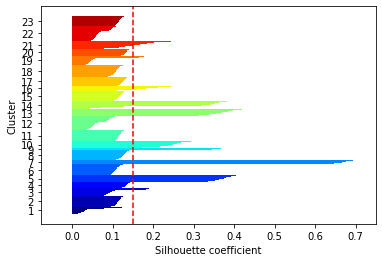

In [74]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(pca_40_cluster_labels):

    c_silhouette_vals = silhouette_pca_full_vals[y_knn_full == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_pca_full_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, pca_40_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [62]:
#TSNE

In [63]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [64]:
tsne_pca_40 = tsne.fit_transform(pca_40_df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5199 samples in 0.007s...
[t-SNE] Computed neighbors for 5199 samples in 1.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5199
[t-SNE] Computed conditional probabilities for sample 2000 / 5199
[t-SNE] Computed conditional probabilities for sample 3000 / 5199
[t-SNE] Computed conditional probabilities for sample 4000 / 5199
[t-SNE] Computed conditional probabilities for sample 5000 / 5199
[t-SNE] Computed conditional probabilities for sample 5199 / 5199
[t-SNE] Mean sigma: 0.964344
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.007454
[t-SNE] KL divergence after 300 iterations: 2.193972


In [65]:
df = pd.DataFrame({"tsne-2d-one":tsne_pca_40[:,0],"tsne-2d-two":tsne_pca_40[:,1], "y": y_knn_full })

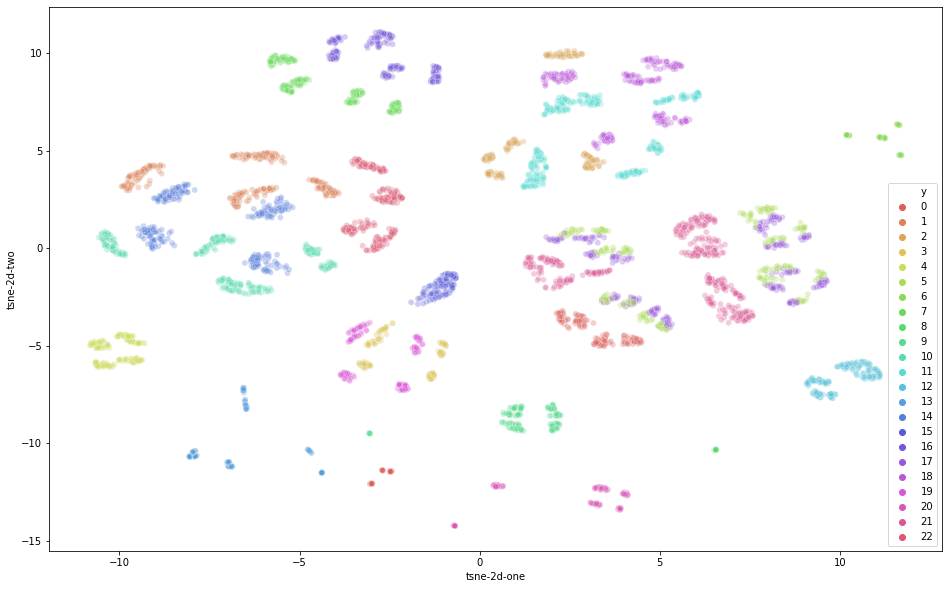

In [66]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 23),
    data=df,
    legend="full",
    alpha=0.3
)

In [67]:
#aggolmerative clustering

In [72]:
ac_23 = AgglomerativeClustering(n_clusters=23, affinity='euclidean', linkage='complete')
ac_23_labels = ac_23.fit_predict(pca_40_df)
print('Cluster labels: %s' %ac_23_labels)

Cluster labels: [20  1 10 ...  8 16  1]


In [73]:
ac_23_cluster_labels = np.unique(ac_23_labels)
n_clusters = 23
silhouette_ac_23_full_vals = silhouette_samples(pca_40_df,ac_23_labels)

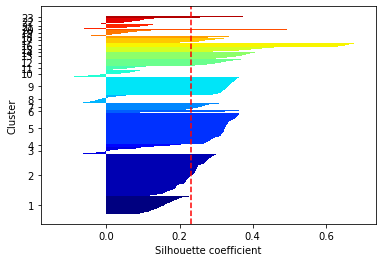

In [75]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(ac_23_cluster_labels):

    c_silhouette_vals = silhouette_ac_23_full_vals[ac_23_labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_ac_23_full_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, ac_23_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [ ]:
pca_40_cluster_labels = np.unique(kmeans_full.labels_)
n_clusters = pca_40_cluster_labels.shape[0]
silhouette_pca_full_vals = silhouette_samples(pca_40_df,y_knn_full)